# Lending Club Case Study

In [10]:
#Import Necessary Libraries

In [177]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [178]:
#Read the Excel file and store in a dataframe
##Got DTypeWarning error while reading CSV. Hence set the low memory as False.
##The reason we get this low_memory warning is because guessing dtypes for each column is very memory demanding. Pandas tries to determine what dtype to set by analyzing the data in each column.

In [179]:
df = pd.read_csv(r'C:\Users\ASUS\Documents\AI ML\Lending Club\loan.csv', low_memory=False)

In [180]:
#Output the top five columns of DataFrame

In [181]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [182]:
#Check for Null Values in DataFrame

In [183]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [184]:
#Create a copy of the DataFrame so as not to affect the original

In [187]:
df2 = df.copy()

In [188]:
#Remove all the columns which have ALL Null Values

In [189]:
df2 = df1.dropna(axis=1,how='all')

In [190]:
#Check the null value sum now

In [191]:
df2.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [192]:
#Clean up columns with NULL values

In [193]:
#Replace emp_title Null values with ABCDEF(dummy company)

In [194]:
df2['emp_title'] = df2['emp_title'].fillna('ABCDEF')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6208\841502619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['emp_title'] = df2['emp_title'].fillna('ABCDEF')


In [195]:
df2['emp_title']

0                            ABCDEF
1                             Ryder
2                            ABCDEF
3               AIR RESOURCES BOARD
4          University Medical Group
                    ...            
39712               FiSite Research
39713    Squarewave Solutions, Ltd.
39714                        ABCDEF
39715                        ABCDEF
39716              Evergreen Center
Name: emp_title, Length: 39717, dtype: object

In [196]:
#Replace emp_length Null values with 0 Years

In [197]:
df2['emp_length'] = df2.loc[:,'emp_length'].fillna(0)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6208\333865005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['emp_length'] = df2.loc[:,'emp_length'].fillna(0)


In [198]:
df2['emp_length'].isnull().sum()

0

In [199]:
#Clean emp_length column to make it complete integer value i.e. Extract Integer values from Strings

In [201]:
df2['emp_length'] = df2.emp_length.str.extract('(\d+)')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6208\822010031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['emp_length'] = df2.emp_length.str.extract('(\d+)')


In [202]:
df2['emp_length']

0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 39717, dtype: object

In [203]:
#Fill mths_since_last_delinq NA values as 0 months

In [204]:
df2['mths_since_last_delinq'] = df2['mths_since_last_delinq'].fillna(0)
df2['mths_since_last_delinq'] = df2['mths_since_last_delinq'].astype('int')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6208\1379881623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['mths_since_last_delinq'] = df2['mths_since_last_delinq'].fillna(0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6208\1379881623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['mths_since_last_delinq'] = df2['mths_since_last_delinq'].astype('int')


In [205]:
df2['mths_since_last_delinq']

0         0
1         0
2         0
3        35
4        38
         ..
39712     0
39713     5
39714     0
39715     0
39716    11
Name: mths_since_last_delinq, Length: 39717, dtype: int32

In [206]:
#Fill mths_since_last_record NA values as 0 months 

In [207]:
df2['mths_since_last_record'] = df2['mths_since_last_record'].fillna(0)
df2['mths_since_last_record'] = df2['mths_since_last_record']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6208\3726113991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['mths_since_last_record'] = df2['mths_since_last_record'].fillna(0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6208\3726113991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['mths_since_last_record'] = df2['mths_since_last_record']


In [208]:
#Dropping all below mentioned columns which are unrequired in my opinion
#mths_since_last_record, pub_rec, initial_list_status, next_pymnt_d, collections_12_mths_ex_med, policy_code, application_type

In [209]:
df2 = df2.drop(['mths_since_last_record', 'pub_rec', 'initial_list_status', 'next_pymnt_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type'], axis=1)

In [210]:
df2.isnull().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                       0
emp_length                   1075
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
url                             0
desc                        12940
purpose                         0
title                          11
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
mths_since_last_delinq          0
open_acc      

In [211]:
#Data has been Cleaned

In [212]:
#To identify Risky borrowers, below factors can be applied
#1. If Source of borrower is not verified, then its risky
#2. If home of borrower is already in mortgage, then its a risk factor
#3. Ratio of salary vs loan disbursed should be less. So higher the percentage of loan amount compared to salary greater the risk
#4. Borrowers tagged as "Charged Off" are risks

In [213]:
#1. If Source of borrower is not verified, then its risky

In [214]:
df['unverified'] = df['verification_status'] == 'Not Verified'


In [215]:
df_unverified = df[df['unverified']]

In [216]:
#List of unverified IDs

In [217]:
df_unverified

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,unverified
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,True
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,True
10,1070078,1305201,6500,6500,6500.0,60 months,14.65%,153.45,C,C3,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,True
15,1069759,1304871,1000,1000,1000.0,36 months,16.29%,35.31,D,D1,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,True
16,1065775,1299699,10000,10000,10000.0,36 months,15.27%,347.98,C,C4,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [218]:
#16921 borrowers are Unverified and so at risk
#Lets plot a pie chart of the Unverified borrowers

Text(0.5, 1.0, 'Unverified Borrowers')

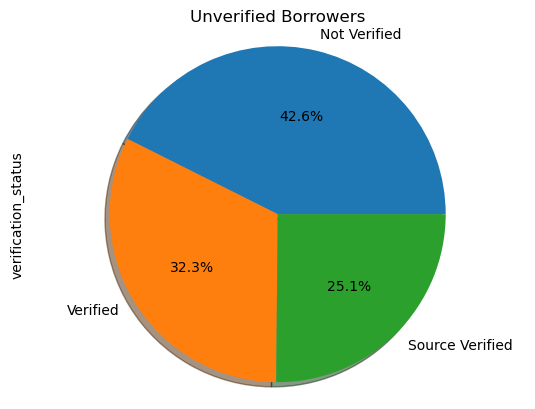

In [238]:
df2.verification_status.value_counts().plot(kind='pie',autopct='%1.1f%%',shadow= True)
plt.axis('equal')
plt.title('Unverified Borrowers')

In [232]:
#2. If home of borrower is already in mortgage, then its a risk factor

In [251]:
df2['mortgage'] = df2['home_ownership'] == 'MORTGAGE'
df2[df2['mortgage']]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,mortgage
17,1069971,1304884,3600,3600,3600.0,36 months,6.03%,109.57,A,A1,...,0.0,13-May,583.45,14-May,0,0.0,0,0.0,0.0,True
18,1062474,1294539,6000,6000,6000.0,36 months,11.71%,198.46,B,B3,...,0.0,15-Feb,16.98,15-Jul,0,0.0,0,0.0,0.0,True
25,1069697,1273773,15000,15000,15000.0,36 months,9.91%,483.38,B,B1,...,0.0,12-Sep,2447.05,12-Sep,0,0.0,0,0.0,0.0,True
28,1069799,1304678,4000,4000,4000.0,36 months,11.71%,132.31,B,B3,...,0.0,13-Apr,2638.77,16-May,0,0.0,0,0.0,0.0,True
30,1032111,1261745,4375,4375,4375.0,36 months,7.51%,136.11,A,A3,...,0.0,15-Jan,144.94,14-Dec,0,0.0,0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39708,92552,92542,5000,5000,375.0,36 months,9.96%,161.25,B,B5,...,0.0,10-Jul,162.07,10-Jun,0,NaN,0,NaN,NaN,True
39711,92402,92390,5000,5000,700.0,36 months,8.70%,158.30,B,B1,...,0.0,10-Jul,159.83,14-Nov,0,NaN,0,NaN,NaN,True
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,0.0,10-Jul,80.90,10-Jun,0,NaN,0,NaN,NaN,True
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.0,8-Apr,0.00,7-Jun,0,NaN,0,NaN,NaN,True


In [ ]:
#17659 borrowers are under Mortgage

In [252]:
#Piechart depicting percentage of borrowers in mortgage

Text(0.5, 1.0, 'Home Under Mortgage')

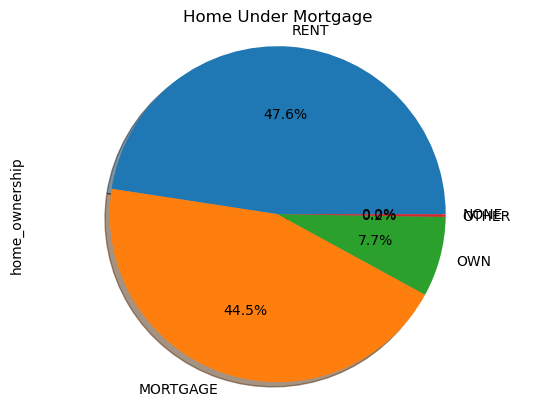

In [253]:
df2.home_ownership.value_counts().plot(kind='pie',autopct='%1.1f%%',shadow = True)
plt.axis('equal')
plt.title('Home Under Mortgage')

In [254]:
#3. Ratio of salary vs loan disbursed should be less. So higher the percentage of loan amount compared to salary greater the risk

In [344]:
df2['Salary Vs Loan'] = (df2['funded_amnt']/df2['annual_inc'])*100

In [345]:
df2_Risk_Based_On_Salary = df2.sort_values(by=['Salary Vs Loan'], ascending = False)

In [ ]:
#Top 10 risky borrowers based on loan payback capacity

In [346]:
df2_Risk_Based_On_Salary.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,mortgage,Salary Vs Loan
39200,242642,237046,16600,16600,3590.670000,36 months,9.76%,533.77,B,B2,...,11-Feb,542.62,15-Feb,0,0.0,0,NaN,0.0,True,83.000000
10965,822845,1031350,30000,30000,27212.914320,60 months,19.29%,783.02,E,E4,...,16-May,783.02,16-Apr,0,0.0,0,0.0,0.0,False,78.125000
11969,805663,1011728,35000,35000,34975.000000,60 months,12.99%,796.18,C,C1,...,12-Dec,28069.18,14-Jan,0,0.0,0,0.0,0.0,False,77.777778
39431,200886,200841,9325,9325,1868.290000,36 months,8.38%,293.85,A,A5,...,11-Jan,300.60,11-Jan,0,0.0,0,NaN,0.0,False,77.708333
19724,670629,857337,26000,26000,25975.000000,60 months,18.25%,663.78,F,F1,...,11-Mar,26398.06,11-Mar,0,0.0,0,0.0,0.0,True,77.380952
39230,249699,249616,20050,20050,3025.004566,36 months,9.76%,644.71,B,B2,...,9-Dec,644.71,10-May,0,0.0,0,NaN,0.0,False,77.115385
9333,838602,1048698,22750,22750,22725.000000,60 months,15.62%,548.66,D,D1,...,14-Jun,548.66,14-Oct,0,0.0,0,0.0,0.0,False,75.833333
14561,763793,964449,18825,18825,18825.000000,60 months,11.99%,418.66,B,B5,...,15-Sep,4016.99,15-Sep,0,0.0,0,0.0,0.0,False,72.403846
30701,497118,637218,13000,13000,12173.306770,36 months,7.88%,406.65,A,A5,...,12-Sep,2387.53,16-Apr,0,0.0,0,0.0,0.0,False,72.222222
7203,884937,1100520,7200,7200,7175.000000,36 months,6.03%,219.14,A,A1,...,14-Oct,221.23,14-Nov,0,0.0,0,0.0,0.0,False,71.428571


In [263]:
#Scatter Plot depicting how much risk based on funded amount

<Axes: xlabel='funded_amnt', ylabel='Salary Vs Loan'>

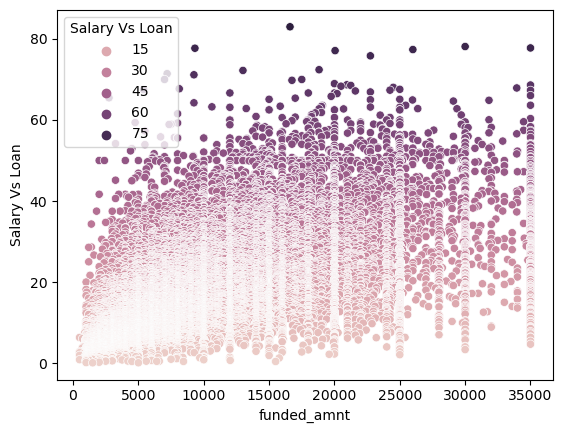

In [347]:
sns.scatterplot(data=df2_Risk_Based_On_Salary, x= 'funded_amnt', y = 'Salary Vs Loan', hue = 'Salary Vs Loan')

In [269]:
#4. Borrowers tagged as "Charged Off" are risks

In [271]:
df2_ChargedOff = df2['loan_status'] == 'Charged Off'
df2[df2_ChargedOff]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,mortgage,Salary Vs Loan
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,13-Apr,119.66,13-Sep,0,0.0,0,0.0,0.0,False,8.333333
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,12-Apr,152.39,12-Aug,0,0.0,0,0.0,0.0,False,14.000000
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,12-Nov,121.45,13-Mar,0,0.0,0,0.0,0.0,False,35.833333
12,1064687,1298717,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,...,12-Jul,305.38,12-Nov,0,0.0,0,0.0,0.0,False,30.000000
14,1069057,1303503,10000,10000,10000.0,36 months,10.65%,325.74,B,B2,...,13-Oct,325.74,14-Mar,0,0.0,0,0.0,0.0,False,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39667,118823,118026,2500,2500,675.0,36 months,12.80%,84.00,D,D4,...,10-Mar,1.76,16-May,0,NaN,0,NaN,0.0,True,7.812500
39668,118533,117783,2500,2500,825.0,36 months,9.64%,80.26,B,B4,...,10-Mar,1.40,16-May,0,NaN,0,NaN,0.0,True,3.333333
39669,118523,118519,6500,6500,225.0,36 months,15.01%,225.37,F,F1,...,9-Feb,225.37,16-May,0,NaN,0,NaN,0.0,True,3.051643
39678,113179,113093,1000,1000,950.0,36 months,10.59%,32.55,C,C2,...,9-May,32.55,9-Oct,0,NaN,0,NaN,0.0,True,2.942042


In [ ]:
#5627 are charged Off

In [272]:
#PieChart depicting percentage of people Charged Off

Text(0.5, 1.0, 'Charged Off Borrowers')

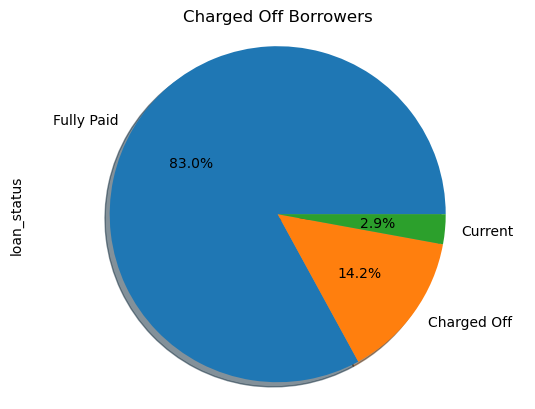

In [273]:
df2.loan_status.value_counts().plot(kind='pie',autopct='%1.1f%%',shadow = True)
plt.axis('equal')
plt.title('Charged Off Borrowers')

In [ ]:
#Now we can find the most at risk borrowers by combining the above 4 points

In [306]:
df3 = df2.copy()

In [318]:
df4 = df3[(df3['verification_status'] == 'Not Verified')]


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,mortgage,Salary Vs Loan
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,14-Jun,649.91,16-May,0,0.0,0,0.0,0.0,False,19.588639
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,16-May,1313.76,16-May,0,0.0,0,0.0,0.0,False,14.892350
10,1070078,1305201,6500,6500,6500.0,60 months,14.65%,153.45,C,C3,...,13-Jun,1655.54,15-Dec,0,0.0,0,0.0,0.0,False,9.027778
15,1069759,1304871,1000,1000,1000.0,36 months,16.29%,35.31,D,D1,...,15-Jan,36.32,16-May,0,0.0,0,0.0,0.0,False,3.571429
16,1065775,1299699,10000,10000,10000.0,36 months,15.27%,347.98,C,C4,...,15-Jan,370.46,15-Apr,0,0.0,0,0.0,0.0,False,23.809524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,10-Jul,80.90,10-Jun,0,NaN,0,NaN,NaN,True,2.272727
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,10-Jul,281.94,10-Jul,0,NaN,0,NaN,NaN,False,47.222222
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,8-Apr,0.00,7-Jun,0,NaN,0,NaN,NaN,True,5.000000
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,8-Jan,0.00,7-Jun,0,NaN,0,NaN,NaN,True,2.500000


In [322]:
df5 = df4['mortgage']


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,mortgage,Salary Vs Loan
17,1069971,1304884,3600,3600,3600.0,36 months,6.03%,109.57,A,A1,...,13-May,583.45,14-May,0,0.0,0,0.0,0.0,True,3.272727
28,1069799,1304678,4000,4000,4000.0,36 months,11.71%,132.31,B,B3,...,13-Apr,2638.77,16-May,0,0.0,0,0.0,0.0,True,3.773585
42,1069314,1304202,3000,3000,3000.0,36 months,18.25%,108.84,D,D5,...,15-Jan,115.38,16-May,0,0.0,0,0.0,0.0,True,4.615385
44,1069469,1304526,6000,6000,6000.0,36 months,6.03%,182.62,A,A1,...,12-Jul,15.01,12-Jun,0,0.0,0,0.0,0.0,True,13.157895
50,1069248,1304123,15000,15000,15000.0,36 months,9.91%,483.38,B,B1,...,14-Oct,483.38,15-Mar,0,0.0,0,0.0,0.0,True,18.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39708,92552,92542,5000,5000,375.0,36 months,9.96%,161.25,B,B5,...,10-Jul,162.07,10-Jun,0,NaN,0,NaN,NaN,True,10.416667
39711,92402,92390,5000,5000,700.0,36 months,8.70%,158.30,B,B1,...,10-Jul,159.83,14-Nov,0,NaN,0,NaN,NaN,True,6.666667
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,10-Jul,80.90,10-Jun,0,NaN,0,NaN,NaN,True,2.272727
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,8-Apr,0.00,7-Jun,0,NaN,0,NaN,NaN,True,5.000000


In [330]:
df6 = df4[df5]
df6

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,mortgage,Salary Vs Loan
17,1069971,1304884,3600,3600,3600.0,36 months,6.03%,109.57,A,A1,...,13-May,583.45,14-May,0,0.0,0,0.0,0.0,True,3.272727
28,1069799,1304678,4000,4000,4000.0,36 months,11.71%,132.31,B,B3,...,13-Apr,2638.77,16-May,0,0.0,0,0.0,0.0,True,3.773585
42,1069314,1304202,3000,3000,3000.0,36 months,18.25%,108.84,D,D5,...,15-Jan,115.38,16-May,0,0.0,0,0.0,0.0,True,4.615385
44,1069469,1304526,6000,6000,6000.0,36 months,6.03%,182.62,A,A1,...,12-Jul,15.01,12-Jun,0,0.0,0,0.0,0.0,True,13.157895
50,1069248,1304123,15000,15000,15000.0,36 months,9.91%,483.38,B,B1,...,14-Oct,483.38,15-Mar,0,0.0,0,0.0,0.0,True,18.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39708,92552,92542,5000,5000,375.0,36 months,9.96%,161.25,B,B5,...,10-Jul,162.07,10-Jun,0,NaN,0,NaN,NaN,True,10.416667
39711,92402,92390,5000,5000,700.0,36 months,8.70%,158.30,B,B1,...,10-Jul,159.83,14-Nov,0,NaN,0,NaN,NaN,True,6.666667
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,10-Jul,80.90,10-Jun,0,NaN,0,NaN,NaN,True,2.272727
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,8-Apr,0.00,7-Jun,0,NaN,0,NaN,NaN,True,5.000000


In [336]:
df7 = df6['loan_status'] == 'Charged Off'

In [338]:
df_riskiest = df6[df7]
df_riskiest

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,mortgage,Salary Vs Loan
50,1069248,1304123,15000,15000,15000.0,36 months,9.91%,483.38,B,B1,...,14-Oct,483.38,15-Mar,0,0.0,0,0.0,0.0,True,18.750000
97,1068542,1303143,17500,17500,17500.0,60 months,17.27%,437.47,D,D3,...,13-Apr,437.47,15-Dec,0,0.0,0,0.0,0.0,True,38.888889
155,1067818,1247741,5600,5600,5600.0,36 months,14.65%,193.17,C,C3,...,12-Aug,193.17,16-May,0,0.0,0,0.0,0.0,True,6.588235
195,1067038,1301405,12000,12000,12000.0,36 months,14.27%,411.71,C,C2,...,12-Oct,411.71,13-Feb,0,0.0,0,0.0,0.0,True,17.142857
203,1031265,1260676,13650,13650,13650.0,36 months,12.42%,456.12,B,B4,...,13-May,456.12,13-Oct,0,0.0,0,0.0,0.0,True,15.872093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39667,118823,118026,2500,2500,675.0,36 months,12.80%,84.00,D,D4,...,10-Mar,1.76,16-May,0,NaN,0,NaN,0.0,True,7.812500
39668,118533,117783,2500,2500,825.0,36 months,9.64%,80.26,B,B4,...,10-Mar,1.40,16-May,0,NaN,0,NaN,0.0,True,3.333333
39669,118523,118519,6500,6500,225.0,36 months,15.01%,225.37,F,F1,...,9-Feb,225.37,16-May,0,NaN,0,NaN,0.0,True,3.051643
39678,113179,113093,1000,1000,950.0,36 months,10.59%,32.55,C,C2,...,9-May,32.55,9-Oct,0,NaN,0,NaN,0.0,True,2.942042


In [335]:
#836 are HIGH RISK borrowers and should be scrutinised

In [339]:
df_riskiest.to_excel('Risky Borrowers.xlsx', index=False)

In [340]:
#Check the top 10 highest funded amount of the riskiest borrowers

In [343]:
df_riskiest.sort_values(by = 'funded_amnt', ascending = False).head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,mortgage,Salary Vs Loan
16303,734645,931193,31000,31000,28412.413900,60 months,13.06%,706.30,C,C2,...,12-Aug,1447.91,15-Oct,0,0.0,0,0.0,0.0,True,41.333333
32845,476966,604474,25000,25000,22125.000000,36 months,15.31%,870.39,D,D3,...,10-Apr,870.39,16-May,0,0.0,0,0.0,0.0,True,10.416667
31867,487311,621181,25000,25000,22975.000000,36 months,10.25%,809.62,B,B2,...,11-Oct,43.65,11-Dec,0,0.0,0,0.0,0.0,True,22.727273
38264,361356,369771,25000,25000,2711.178345,36 months,11.46%,823.93,B,B5,...,9-Mar,823.93,16-May,0,0.0,0,0.0,0.0,True,29.069767
39102,256365,256357,25000,25000,750.000311,36 months,10.71%,815.04,B,B5,...,9-Jan,815.04,16-May,0,0.0,0,NaN,0.0,True,48.076923
32320,483962,615973,25000,25000,24925.000000,36 months,16.45%,884.44,E,E1,...,10-Oct,884.44,16-May,0,0.0,0,1.0,0.0,True,13.888889
30441,506881,653616,25000,25000,24842.450000,36 months,10.99%,818.38,B,B4,...,11-Feb,12818.38,11-Jul,0,0.0,0,0.0,0.0,True,18.939394
32842,476988,604531,25000,25000,22395.410000,36 months,18.09%,904.88,F,F1,...,11-Aug,120.05,16-May,0,0.0,0,0.0,0.0,True,25.000000
38956,292921,292891,25000,25000,9574.999856,36 months,13.55%,848.99,D,D4,...,8-Jul,848.99,16-May,0,0.0,0,0.0,0.0,True,40.322581
39341,224381,223623,25000,25000,1750.005358,36 months,16.15%,880.78,F,F3,...,10-Jul,880.88,10-Nov,0,0.0,0,NaN,0.0,True,22.123894
